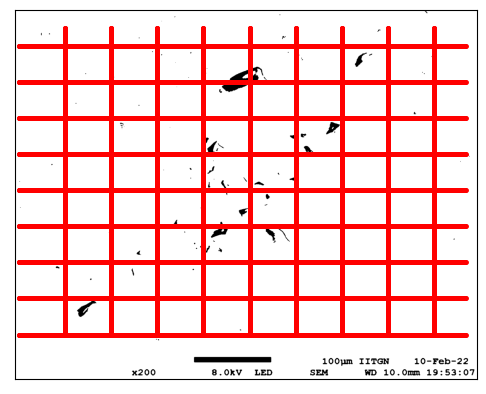

2.614836561281514
[0. 0. 0. 1. 2. 5. 5. 5. 5. 1. 1. 3. 4. 7. 7. 7. 7.]
3.5294117647058822


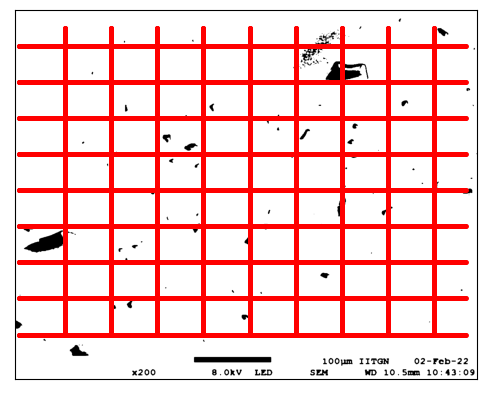

3.3259176771323924
[ 1.  1.  1.  1.  3.  4.  6.  7.  7.  1.  2.  3.  4.  6.  9. 10. 10. 10.]
4.777777777777778


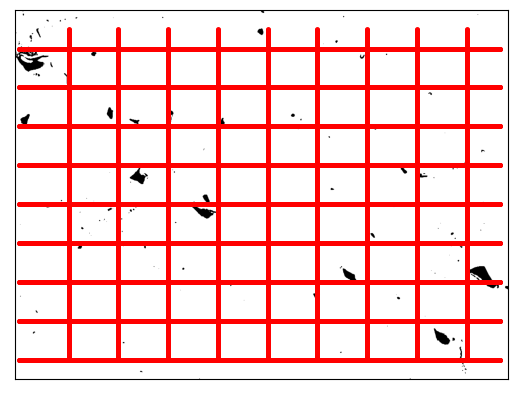

2.7312774562848565
[ 1.  2.  3.  3.  3.  4.  4.  5.  6.  4.  5.  6.  6.  7.  7. 10. 10. 11.]
5.388888888888889


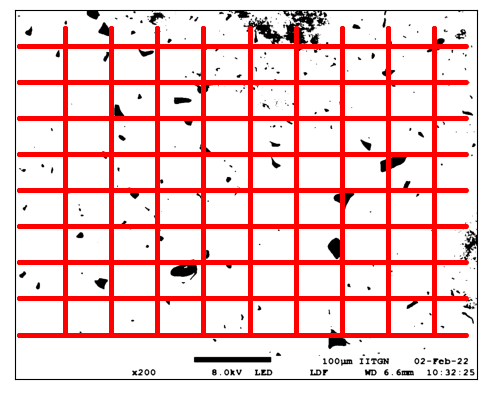

7.455216087651668
[ 0.  1.  2.  4.  6.  8. 10. 12. 14.  6.  9. 12. 16. 18. 19. 21. 23. 25.]
11.444444444444445


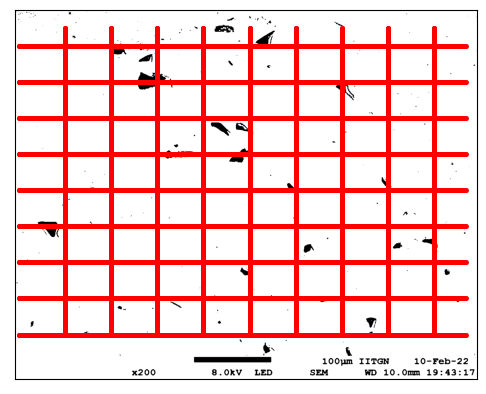

5.243749954016391
[ 1.  3.  5.  5.  9. 10. 11. 14. 18.  5.  7.  7. 10. 11. 13. 14. 18. 20.]
10.055555555555555


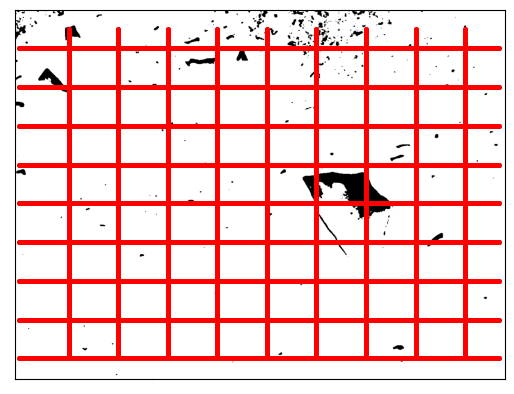

5.998971105196928
[ 1.  1.  2.  2.  4.  8.  9.  9.  9.  8. 11. 13. 13. 16. 18. 18. 18. 18.]
9.88888888888889


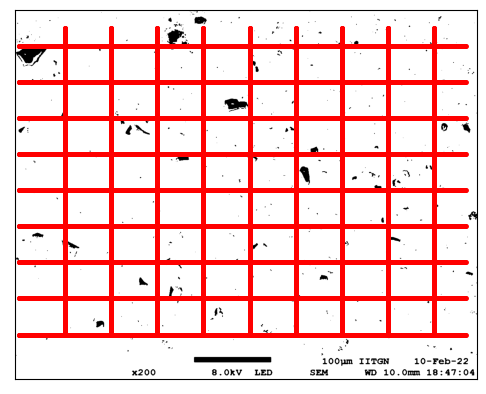

6.897172439073927
[ 2.  3.  3.  4.  8. 12. 14. 16. 19.  6.  7.  8. 10. 15. 15. 18. 24. 25.]
11.61111111111111


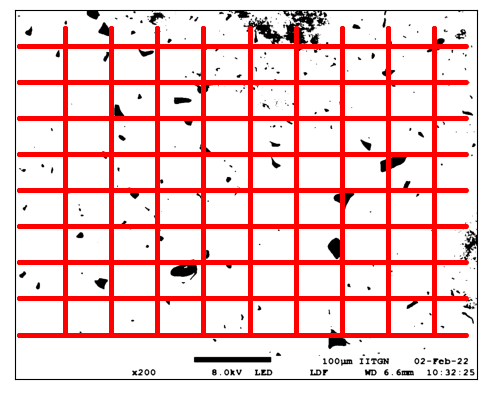

7.455216087651668
[ 0.  1.  2.  4.  6.  8. 10. 12. 14.  6.  9. 12. 16. 18. 19. 21. 23. 25.]
11.444444444444445


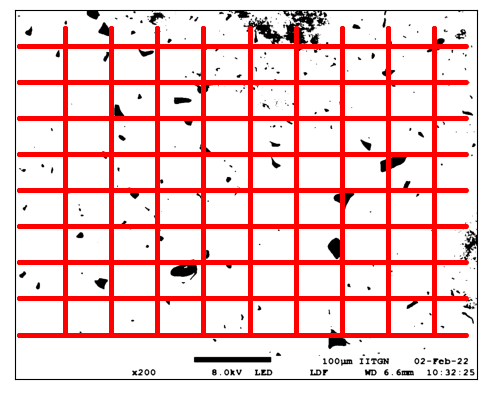

7.455216087651668
[ 0.  1.  2.  4.  6.  8. 10. 12. 14.  6.  9. 12. 16. 18. 19. 21. 23. 25.]
11.444444444444445


<Figure size 640x480 with 0 Axes>

In [17]:
import os
from PIL import Image
import numpy as np
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt
import glob
import csv

# Create a csv file-RECENT ONE
with open('outputimages.csv', 'w', newline='') as csv_file:
    # Create a csv writer object
    csv_writer = csv.writer(csv_file)

    # Write header row
    csv_writer.writerow(['Filename', 'SD', 'Mean', 'Array_NOP'])

    # Loop through all image files in the file list
    for filename in file_list:
        # Load image
        img = Image.open(filename)
        I = np.array(img)
        Img = 255 - I
        img1 = np.zeros(Img.shape)
        img1[Img > 0] = 1
        on_line_1 = []
        on_line_2 = []
        len_line = 850

        # Find Connected components and the label image
        L, n = ndimage.label(~img1.astype(bool))
        Unique_numbers = np.unique(L)
        unique_no = len(Unique_numbers)
        number_of_particle_vertical = np.zeros(9)
        number_of_particle_horizontal = np.zeros(9)

        # Initialize starting points of lines
        c = [138, 266, 394, 522, 650, 778, 906, 1034, 1162]
        m = [0, 0, 0, 0, 0, 0, 0, 0, 0]
        x1 = [50, 50, 50, 50, 50, 50, 50, 50, 50]

        # Plot the lines and count number of particles
        plt.imshow(img1, cmap='gray')
        for k in range(len(c)):
            for i in range(x1[k], x1[k] + len_line):
                j = round(m[k]*i + c[k])
                if i < L.shape[0] and j < L.shape[1] and L[i, j] > 0:
                    on_line_1.append(L[i, j])
                plt.plot(j, i, 'r.', markersize=5)

            number_of_particle_vertical[k] = len(np.unique(on_line_1))

        for g in range(100, 901, 100):
            for h in range(10, len_line + 400):
                if g < L.shape[0] and h < L.shape[1] and L[g, h] > 0:
                    on_line_2.append(L[g, h])
                plt.plot(h, g, 'r.', markersize=5)
            number_of_particle_horizontal[g//100-1] = len(np.unique(on_line_2))

        number_of_particle_horizontal = number_of_particle_horizontal[number_of_particle_horizontal != 0]
        number_of_particles = np.concatenate((number_of_particle_vertical, number_of_particle_horizontal))
        ARRAY_NOP = number_of_particles
        MEAN = np.mean(number_of_particles)
        SD = np.std(number_of_particles)
        plt.xticks([], [])
        plt.yticks([], [])
        output_filename = os.path.splitext(os.path.basename(filename))[0]
        output_filename = output_filename.split("/")[-1] # Get only the name of the file without path

        plt.savefig(output_filename, dpi=300)
        # Display image
        plt.imshow(img1, cmap='gray')
        plt.show()
            # Clear figure
        plt.clf()
            # Write the data to the csv file
        csv_writer.writerow([output_filename, SD, MEAN, ARRAY_NOP])
            # Clear figure
        plt.clf()
        print(SD)
        print(ARRAY_NOP)
        print(MEAN)

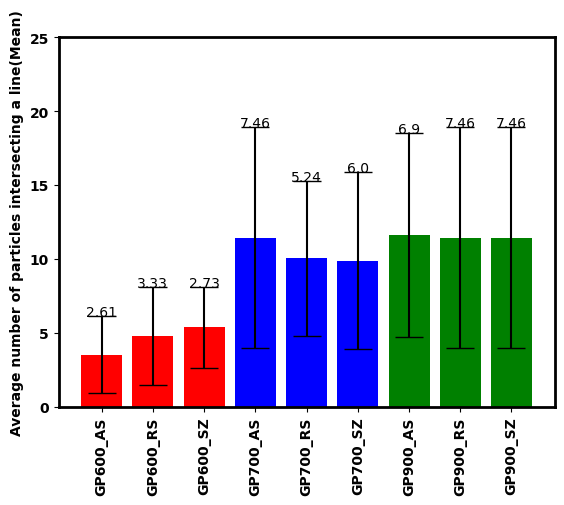

<Figure size 640x480 with 0 Axes>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a Pandas DataFrame
data = pd.read_csv('outputimages.csv')
# Calculate the mean and standard deviation
mean = data['Mean'].mean()
std = np.array(data['SD'])
# Define a list of colors (one for each bar)
colors = ['red']*3 + ['blue']*3+['green']*3 + ['green']*3
# Plot the bar chart with error bars
fig, ax = plt.subplots()
ax.bar(data['Filename'], data['Mean'], yerr=std, capsize=10, width=0.8, color=colors)
# Add the value of the standard deviation on top of each error bar
for i, val in enumerate(data['Mean']):
    ax.text(i, val + std[i], round(std[i], 2), horizontalalignment='center', fontsize=10)
ax.set_ylabel('Average number of particles intersecting a line(Mean)',fontweight='bold')
plt.ylim(0, 25)
for spine in ax.spines.values():
    spine.set_linewidth(2)
# Make the x-axis labels bold
for label in ax.get_xticklabels():
    label.set_weight('bold')
for label in ax.get_yticklabels():
    label.set_weight('bold')
    plt.xticks(rotation=90)
plt.show()
plt.savefig('PD.png')
